# n-gram analysis

This notebook was posted by Simon Lindgren // [@simonlindgren](http://www.twitter.com/simonlindgren) // [simonlindgren.com](http://simonlindgren.com)

It is about stuff that can be done with the `tidytext` package, if we tokenize by consecutive sequences of words ([n-grams](https://en.wikipedia.org/wiki/N-gram)), rather than just by single words. 

The code below is based on the book [Text Mining with R](http://tidytextmining.com) by [Julia Silge](http://juliasilge.com) and [David Robinson](http://varianceexplained.org).

In [1]:
library(tidyverse)
library(tidytext)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


###### Read documents
The code below reads a `csv` file into a tidy dataset. We use `unnest_tokens()` with the `ngram` option to get ngrams of `n` consecutive words.

In [67]:
documents <- read_csv2("tidyraw2.csv")
tidy_documents <- documents %>%
    #unnest_tokens(word,text) 
    unnest_tokens(bigram, text, token = "ngrams", n = 2)

Parsed with column specification:
cols(
  blogger = col_character(),
  date = col_date(format = ""),
  text = col_character()
)


In [68]:
# Inspect the dataframe
tidy_documents

blogger,date,bigram
joe,2016-11-20,when dorothy
joe,2016-11-20,dorothy awoke
joe,2016-11-20,awoke the
joe,2016-11-20,the sun
joe,2016-11-20,sun was
joe,2016-11-20,was shining
joe,2016-11-20,shining through
joe,2016-11-20,through the
joe,2016-11-20,the trees
joe,2016-11-20,trees and


In [69]:
# The most common bigrams
tidy_documents %>%
  count(bigram, sort = TRUE)

bigram,n
of the,53
in the,26
and the,22
to the,21
at the,14
it was,14
on the,12
and i,10
for the,10
i had,10


Lots of those were stopword-type words. We use `tidyr`'s `separate()` function to split the column 'bigram' into 'word 1' and 'word 2' based on the blank space as a separator between them

In [70]:
bigrams_separated <- tidy_documents %>%
  separate(bigram, c("word1", "word2"), sep = " ")
bigrams_separated

blogger,date,word1,word2
joe,2016-11-20,when,dorothy
joe,2016-11-20,dorothy,awoke
joe,2016-11-20,awoke,the
joe,2016-11-20,the,sun
joe,2016-11-20,sun,was
joe,2016-11-20,was,shining
joe,2016-11-20,shining,through
joe,2016-11-20,through,the
joe,2016-11-20,the,trees
joe,2016-11-20,trees,and


Now, remove all rows that have any of `tidytext`'s stopwords in any of them.

In [71]:
bigrams_filtered <- bigrams_separated %>%
  filter(!word1 %in% stop_words$word) %>%
  filter(!word2 %in% stop_words$word)
bigrams_filtered

# This can also be done with own custom list of stopwords:
# Read your own stops: my_stop_words <- read_csv2("swestop.csv")
# use that instead of stop_words

blogger,date,word1,word2
joe,2016-11-20,dorothy,awoke
joe,2016-11-20,chasing,birds
joe,2016-11-20,standing,patiently
joe,2016-11-20,corner,waiting
joe,2016-11-20,dry,bread
joe,2016-11-20,scarecrow,thoughtfully
joe,2016-11-20,dorothy,drank
joe,2016-11-20,bread,left
joe,2016-11-20,yellow,brick
joe,2016-11-20,deep,groan


In [72]:
# new bigram counts:
bigram_counts <- bigrams_filtered %>% 
  count(word1, word2, sort = TRUE)

bigram_counts

word1,word2,n
aunt,em,7
uncle,henry,7
robin,hood,4
dark,hole,2
dorothy,looked,2
dorothy,stood,2
lincoln,green,2
nottingham,town,2
replied,robin,2
sherwood,forest,2


After stopword removal, we might want to recombine the bigrams into one column again:

In [73]:
bigrams_united <- bigrams_filtered %>%
  unite(bigram, word1, word2, sep = " ")

bigrams_united

blogger,date,bigram
joe,2016-11-20,dorothy awoke
joe,2016-11-20,chasing birds
joe,2016-11-20,standing patiently
joe,2016-11-20,corner waiting
joe,2016-11-20,dry bread
joe,2016-11-20,scarecrow thoughtfully
joe,2016-11-20,dorothy drank
joe,2016-11-20,bread left
joe,2016-11-20,yellow brick
joe,2016-11-20,deep groan


In [9]:
# ((The same process but with trigrams))
documents <- read_csv2("tidyraw2.csv")
trigram_documents <- documents %>%
    unnest_tokens(trigram, text, token = "ngrams", n = 3) %>%
    separate(trigram, c("word1", "word2", "word3"), sep = " ") %>%
    filter(!word1 %in% stop_words$word,
         !word2 %in% stop_words$word,
         !word3 %in% stop_words$word) %>%
    count(word1, word2, word3, sort = TRUE)

Parsed with column specification:
cols(
  blogger = col_character(),
  date = col_date(format = ""),
  text = col_character()
)


In [10]:
trigram_documents

word1,word2,word3,n
affirmed,tuan,shaded,1
arrow,fly,alongside,1
aunt,em,badly,1
aunt,em,dropped,1
average,guide,tells,1
badly,frightened,threw,1
bearded,greatly,shouldered,1
beds,uncle,henry,1
boar,partholon’s,people,1
bondage,dorothy,listened,1


In [11]:
# ((recombine trigrams into one column again))
trigrams_united <- trigram_documents %>%
  unite(trigram, word1, word2, word3, sep = " ")

trigrams_united

trigram,n
affirmed tuan shaded,1
arrow fly alongside,1
aunt em badly,1
aunt em dropped,1
average guide tells,1
badly frightened threw,1
bearded greatly shouldered,1
beds uncle henry,1
boar partholon’s people,1
bondage dorothy listened,1


###### Exploratory analysis of bigrams

In [74]:
# Back to the bigrams
# What are the most common pairs with word x as word1 or 2?
# We use the non united columns for that

bigrams_filtered %>%
  filter(word2 == "awoke") %>%
  count(blogger, word1, sort = TRUE)

blogger,word1,n
joe,dorothy,1


In [75]:
# Can do similar things such as with single words
# For example look at the tf-idf of bigrams across the documents
# We use the united column for that

bigram_tf_idf <- bigrams_united %>%
  count(blogger, bigram) %>%
  bind_tf_idf(bigram, blogger, n) %>%
  arrange(desc(tf_idf))

bigram_tf_idf

blogger,bigram,n,tf,idf,tf_idf
joe,aunt em,7,0.03703704,1.3862944,0.05134424
topper,wicked witch,2,0.02702703,1.3862944,0.03746742
paul,nottingham town,2,0.01904762,1.3862944,0.02640561
paul,sherwood forest,2,0.01904762,1.3862944,0.02640561
joe,uncle henry,6,0.03174603,0.6931472,0.02200467
paul,robin hood,3,0.02857143,0.6931472,0.01980421
mick,sun shone,2,0.01351351,1.3862944,0.01873371
topper,arriving opposite,1,0.01351351,1.3862944,0.01873371
topper,bondage dorothy,1,0.01351351,1.3862944,0.01873371
topper,building erected,1,0.01351351,1.3862944,0.01873371


Now, let's visualise the high tf-idf bigrams.

Selecting by tf_idf


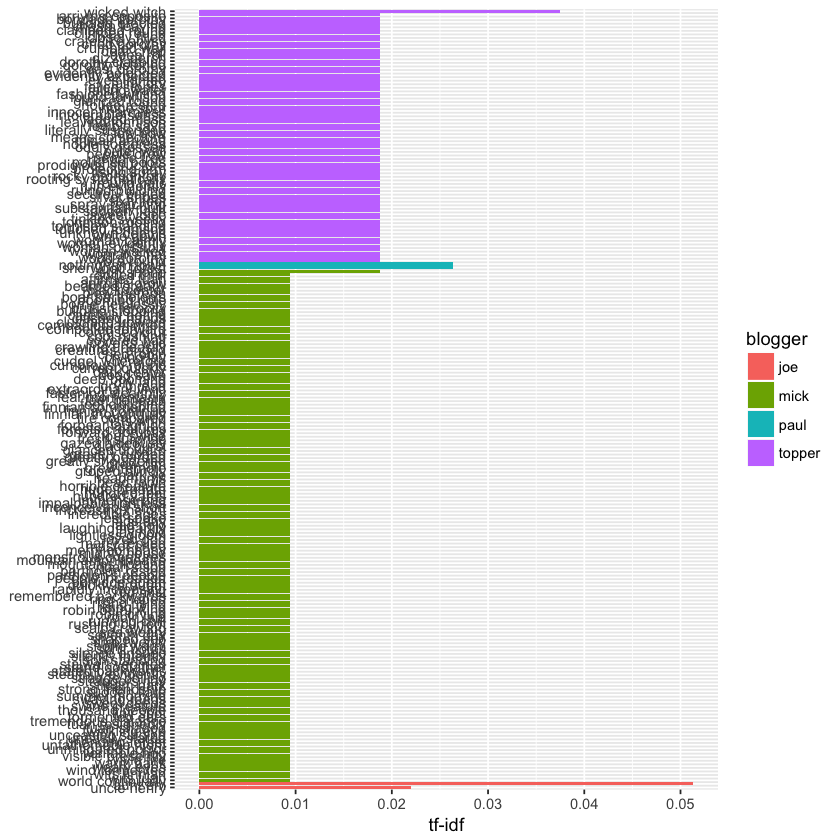

In [76]:
my_plot <- bigram_tf_idf %>%
    arrange(desc(tf_idf)) %>%
    mutate(bigram = factor(bigram, levels = rev(unique(bigram)))) 

my_plot %>%
    top_n(2) %>%
    ggplot(aes(bigram, tf_idf, fill = blogger)) +
    geom_col() +
    labs(x = NULL, y = "tf-idf") +
    coord_flip()

Now, we look at blogs individually:

Selecting by tf_idf


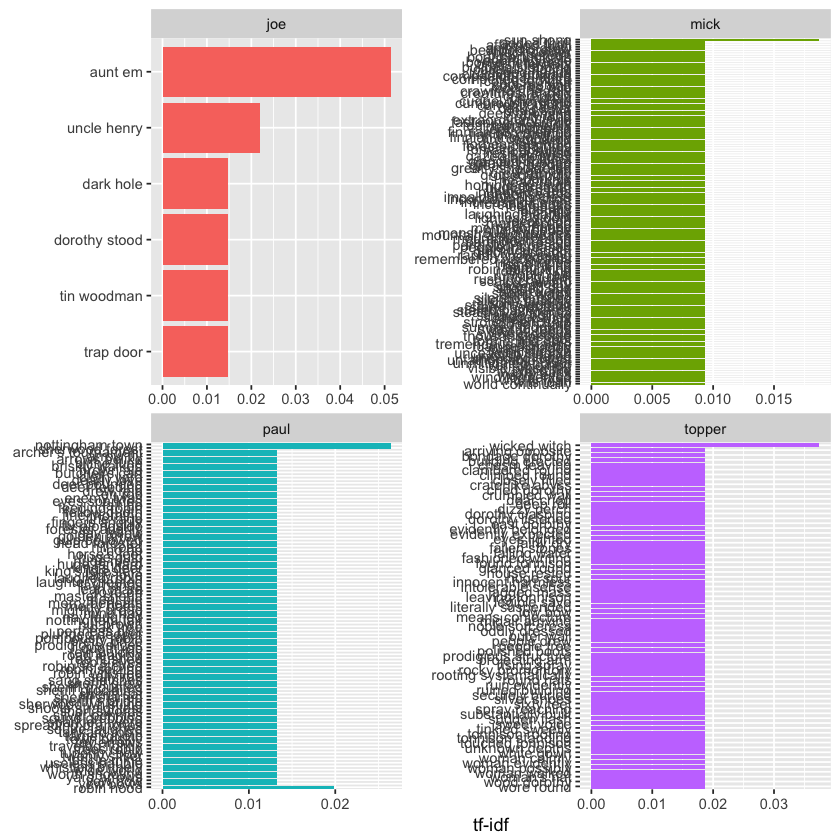

In [77]:
my_plot %>% 
  group_by(blogger) %>% 
  top_n(5) %>% 
  ungroup %>%
  ggplot(aes(bigram, tf_idf, fill = blogger)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~blogger, ncol = 2, scales = "free") +
  coord_flip()

###### Visualising bigrams in a graph
A network graph can be constructed from a tidy object since it has three variables:

- source: the node an edge is coming from
- target: the node an edge is going towards
- weight: A numeric value associated with each edge

We use the `igraph` package and its function `graph_from_data_frame()`. Our dataframe `bigram_counts` from earlier has columns corresponding to 'source', 'target', and 'edge weight' (in this case: `n`).

You may run into problems installing `igraph` via CRAN, but if you use Anaconda you can do: `conda install r-igraph`.

In [78]:
library(igraph)
bigram_counts # dataframe from before

word1,word2,n
aunt,em,7
uncle,henry,7
robin,hood,4
dark,hole,2
dorothy,looked,2
dorothy,stood,2
lincoln,green,2
nottingham,town,2
replied,robin,2
sherwood,forest,2


Let's filter for the most common pairs (edges), and create the network graph.

In [79]:
bigram_graph <- bigram_counts %>%
  filter(n > 1) %>% # filter edges with weight above x
  graph_from_data_frame()

bigram_graph

IGRAPH DN-- 26 14 -- 
+ attr: name (v/c), n (e/n)
+ edges (vertex names):
 [1] aunt      ->em      uncle     ->henry   robin     ->hood   
 [4] dark      ->hole    dorothy   ->looked  dorothy   ->stood  
 [7] lincoln   ->green   nottingham->town    replied   ->robin  
[10] sherwood  ->forest  sun       ->shone   tin       ->woodman
[13] trap      ->door    wicked    ->witch  

The `ggraph` package is better than `igraph` at the visualisation bit, so let's use that one to draw the graph. Installing `ggraph` can be tricky, but [this](https://stackoverflow.com/questions/42315364/how-to-install-ggraph-package-to-the-latest-r-v-3-3-2) may help.

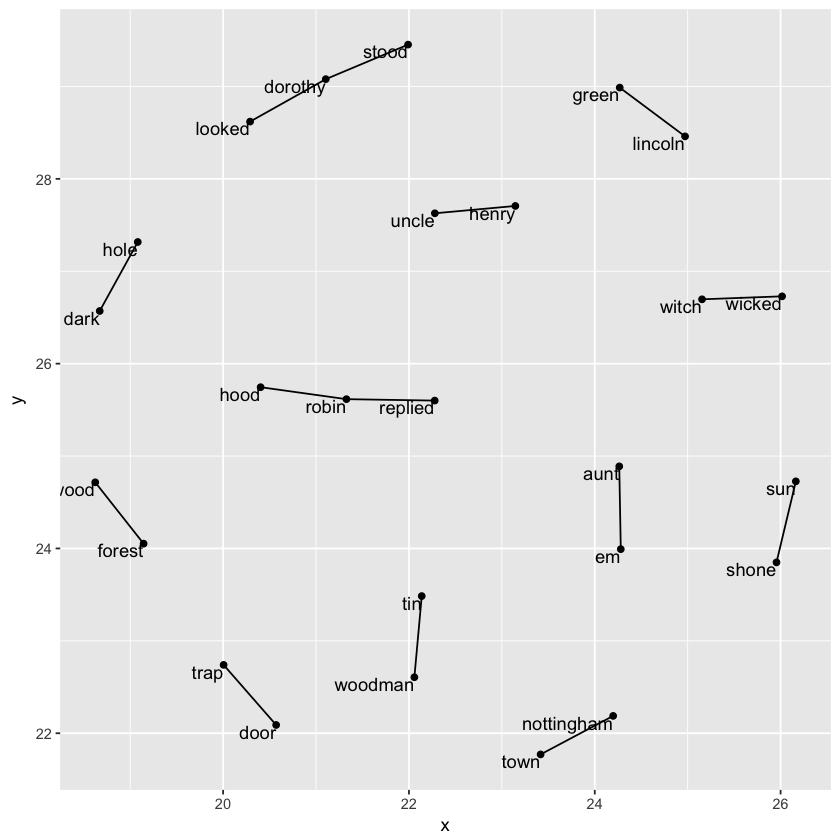

In [80]:
library(ggraph)
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link() +
  geom_node_point() +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)

Now, tweak the graph.

- add a theme that removes the wrongful axes, theme_void()
- tinker with `geom_node_point` to make the nodes blue and larger
- add directionality to `geom_edge_link` with an arrow, constructed using `grid::arrow()`, including an end_cap option that tells the arrow to end before touching the node
- add the `edge_alpha` aesthetic to the link layer to make links transparent based on how common or rare the bigram is

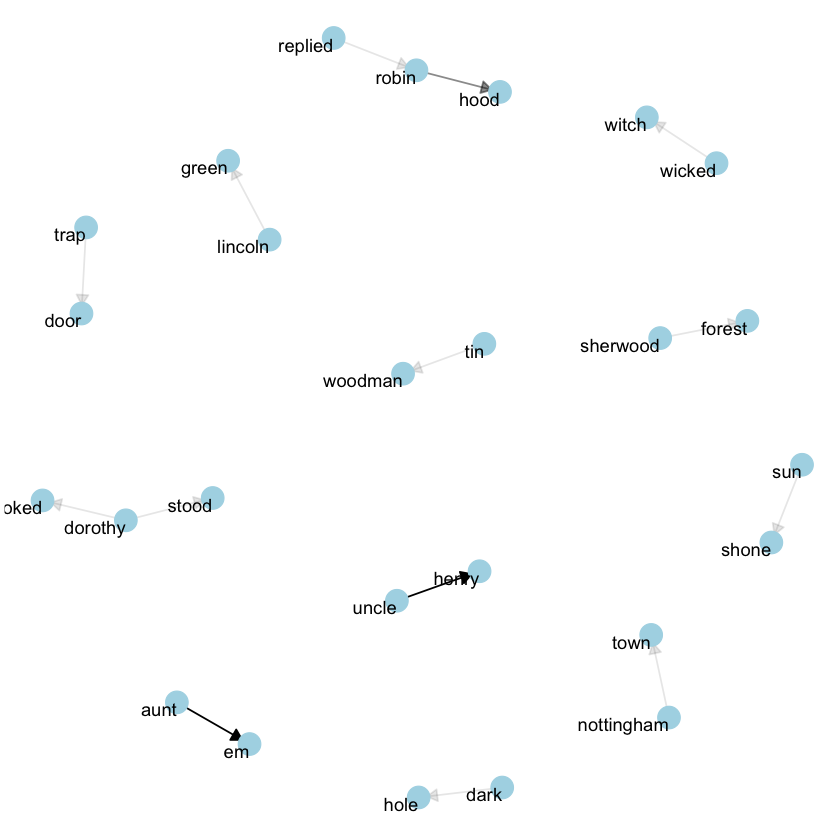

In [82]:
# create the arrows
a <- grid::arrow(type = "closed", length = unit(.10, "inches"))

# the graph
ggraph(bigram_graph, layout = "fr") +
  geom_edge_link(aes(edge_alpha = n), show.legend = FALSE,
                 arrow = a, end_cap = circle(.07, 'inches')) +
  geom_node_point(color = "lightblue", size = 6) +
  geom_node_text(aes(label = name), vjust = 1, hjust = 1)+
  theme_void()